In [1]:
import numpy as np
import akantu as aka
from variationnal_operator_function import *
from plot import *

#### Mesh generation (1D) :

In [2]:
mesh_file = """
Point(1) = {0, 0, 0, 0.1};
Point(2) = {1, 0, 0, 0.1};
"""

In [3]:
mesh_file += """
Line(1) = {1, 2};
"""

In [4]:
open("segment.geo", 'w').write(mesh_file)

points, conn = meshGeo('segment.geo', dim=1, order=1)

Info    : Running '/opt/jlab-env/bin/gmsh -2 -order 1 -o segment.msh segment.geo' [Gmsh 4.11.1, 1 node, max. 1 thread]
Info    : Started on Tue Mar 12 10:36:53 2024
Info    : Reading 'segment.geo'...
Info    : Done reading 'segment.geo'
Info    : Meshing 1D...
Info    : Meshing curve 1 (Line)
Info    : Done meshing 1D (Wall 0.00020662s, CPU 0.000117s)
Info    : Meshing 2D...
Info    : Done meshing 2D (Wall 2.8949e-05s, CPU 1.6e-05s)
Info    : 11 nodes 12 elements
Info    : Writing 'segment.msh'...
Info    : Done writing 'segment.msh'
Info    : Stopped on Tue Mar 12 10:36:53 2024 (From start: Wall 0.0424673s, CPU 0.571205s)
Mesh generated



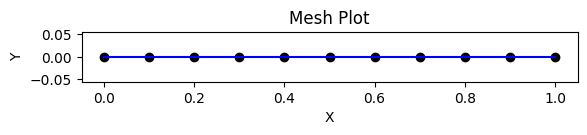

In [5]:
plotMesh(points, conn)

In [6]:
conn

array([[ 0,  2],
       [ 2,  3],
       [ 3,  4],
       [ 4,  5],
       [ 5,  6],
       [ 6,  7],
       [ 7,  8],
       [ 8,  9],
       [ 9, 10],
       [10,  1]])

In [7]:
# reading the mesh
spatial_dimension = 1    
mesh_file = 'segment.msh'
mesh = aka.Mesh(spatial_dimension)
mesh.read(mesh_file)

#### Support declaration

In [8]:
model = aka.SolidMechanicsModel(mesh)
model.initFull(_analysis_method=aka._static)

In [9]:
elem_filter = np.array([])
fem = model.getFEEngine()
spatial_dimension = 1
elemtype = aka._segment_2
ghost_type = aka.GhostType(1) #comment avoir ghost_type vide?
Sup = Support(elem_filter, fem, spatial_dimension, elemtype, ghost_type)

#### Interpolation

In [10]:
# create a field  
nodes = mesh.getNodes()
nodal_field=np.ones(nodes.shape)*3

In [11]:
# output vector (will be filled by the method "interpolateOnIntegrationPoints")
## to adapt depending on the number of quadrature points (support)
nbr_elem = mesh.getConnectivity(Sup.elemtype).shape[0]
output=np.zeros((nbr_elem,1))

In [12]:
NTF = NodalTensorField("ex_displacement", Sup, nodal_field)

In [13]:
output = aka.ElementTypeMapArrayReal()
output.initialize(mesh, nb_component=1)
NTF.evalOnQuadraturePoints(output)

In [14]:
output(aka._segment_2)

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])